In [2]:
"""Re-reading project notes"""
# standard deck of cards
# Values: Ace = 1, J,Q,K = 10
# statistics for the sum of scores when making three card draws
    # choose cards without replacement for each draw
    # hand replaced into deck and deck shuffled after each draw

'Re-reading project notes'

### Q1: A histogram is provided that accurately reflects the card values’ relative frequency distribution.

In [3]:
"""Make list of 52 values from deck of cards"""
value_freq_map = {1:4,2:4,3:4,4:4,5:4,6:4,7:4,8:4,9:4,10:16}

def make_values_list(dict):
    values_list = []
    for key, value in dict.items():
        for i in range(value):
            values_list.append(key)
    return values_list 
        
all_values = make_values_list(value_freq_map)
all_values

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

Note, the value of a single card value is a discrete random variable, but the average of a hand of cards is a continuous random variable.

In [4]:
from collections import defaultdict
import pandas as pd

d = defaultdict(int)
for value in all_values:
    d[value] += 1

grp_values = sorted(d.items())
values_df = pd.DataFrame(grp_values, columns=("value","frequency"))
values_df

,value,frequency
0,1,4
1,2,4
2,3,4
3,4,4
4,5,4
5,6,4
6,7,4
7,8,4
8,9,4
9,10,16


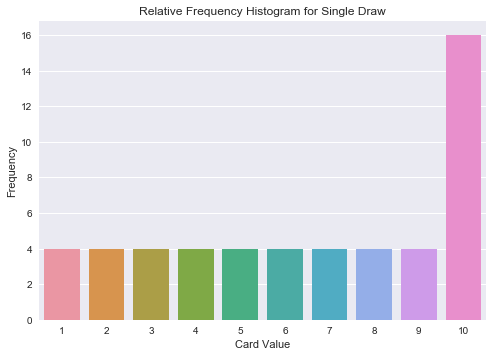

In [5]:
"""Plot list in histogram"""
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.set_style("whitegrid")
sns.barplot(x="value", y="frequency", data=values_df)


ax.set_title("Relative Frequency Histogram for Single Draw")
ax.set_ylabel("Frequency")
ax.set_xlabel("Card Value")
plt.show()

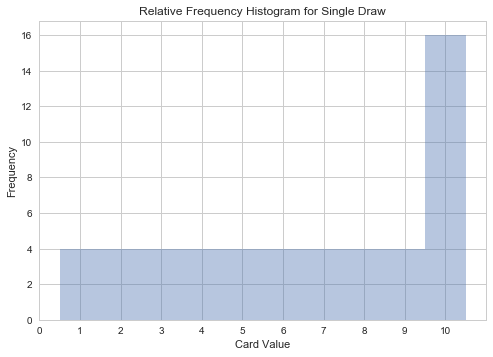

In [6]:
"""Plot list in histogram"""
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.distplot(all_values, bins=10, hist_kws={"range":(0.5,10.5)}, ax=ax, kde=False)

ax.set_title("Relative Frequency Histogram for Single Draw")
ax.set_ylabel("Frequency")
ax.set_xlabel("Card Value")
plt.xticks(range(11))
plt.show()

In [7]:
# true population mean
import statistics as stats

dist_mean = stats.mean(all_values)
dist_mean

6.538461538461538

In [8]:
# population median value
dist_median = stats.median(all_values)
dist_median

7.0

In [9]:
# population standard deviation
dist_pstdev = stats.pstdev(all_values)
dist_pstdev

3.1529079279875685

### Q2: At least thirty samples have been performed and the summed values from each sample have been reported in a supplemental file.

In [10]:
"""Create deck of cards"""
import itertools as it

RANKS = "123456789TJQK"
SUITS = "HSCD"
deck = list(it.product(RANKS,SUITS))

In [11]:
"""Generate Sampling of cards"""
import random as rand

my_seed = 3
rand.seed(my_seed)

def draw_hand(num_cards):
    hand = []
    for i in range(num_cards):
        card = deck[rand.randrange(len(deck))]
        hand.append(card)
    return hand
    
def hands_sampling(num_cards, num_samples):
    all_hands = []
    for i in range(num_samples):
        hand = draw_hand(num_cards)
        all_hands.append(hand)
    return all_hands

sample_size = 30
num_cards = 3
sample_set = hands_sampling(num_cards, sample_size)
sample_set

[[('4', 'D'), ('T', 'S'), ('9', 'C')],
 [('3', 'H'), ('6', 'D'), ('T', 'C')],
 [('8', 'C'), ('J', 'H'), ('T', 'S')],
 [('2', 'H'), ('T', 'C'), ('1', 'H')],
 [('8', 'C'), ('5', 'H'), ('9', 'D')],
 [('4', 'C'), ('4', 'H'), ('Q', 'S')],
 [('8', 'C'), ('9', 'C'), ('9', 'D')],
 [('8', 'C'), ('7', 'S'), ('J', 'H')],
 [('3', 'S'), ('4', 'C'), ('J', 'H')],
 [('3', 'S'), ('9', 'S'), ('7', 'H')],
 [('Q', 'D'), ('1', 'H'), ('J', 'C')],
 [('K', 'S'), ('2', 'H'), ('3', 'C')],
 [('K', 'H'), ('T', 'S'), ('1', 'C')],
 [('5', 'D'), ('K', 'S'), ('1', 'S')],
 [('5', 'S'), ('8', 'C'), ('T', 'C')],
 [('Q', 'C'), ('7', 'H'), ('Q', 'S')],
 [('K', 'C'), ('7', 'D'), ('7', 'S')],
 [('Q', 'C'), ('K', 'D'), ('T', 'H')],
 [('8', 'H'), ('3', 'H'), ('6', 'D')],
 [('2', 'C'), ('1', 'C'), ('3', 'H')],
 [('8', 'D'), ('4', 'S'), ('5', 'H')],
 [('J', 'D'), ('7', 'D'), ('K', 'S')],
 [('J', 'H'), ('5', 'D'), ('7', 'C')],
 [('9', 'H'), ('7', 'H'), ('T', 'H')],
 [('6', 'C'), ('9', 'C'), ('T', 'S')],
 [('7', 'C'), ('T', 'S'),

In [12]:
"""Sum values from each hand"""
# find card value
def card_value(card):
    try:
        value = int(card[0])
        return value
    except:
        return 10
    
# sum the hand
def sum_hand(hand):
    hand_sum = 0
    for card in hand:
        hand_sum += card_value(card)
    return hand_sum
        
# use list comprehension  to make list of all summed hands from sampling
sum_hands = [sum_hand(hand) for hand in sample_set]
sum_hands

[23,
 19,
 28,
 13,
 22,
 18,
 26,
 25,
 17,
 19,
 21,
 15,
 21,
 16,
 23,
 27,
 24,
 30,
 17,
 6,
 17,
 27,
 22,
 26,
 25,
 21,
 17,
 25,
 23,
 25]

### Q3: At least two measures of central tendency and two measures of variability are accurately reported to summarize and describe the samples taken for Question 2.

In [13]:
# mean
dist_mean = stats.mean(sum_hands)
dist_mean

21.266666666666666

In [14]:
# median
dist_median = stats.median(sum_hands)
dist_median

22.0

In [15]:
# standard deviation
dist_stdev = stats.stdev(sum_hands)
dist_stdev

5.14569343427494

Interquartile range: The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers 

In [16]:
# interquartile range
from scipy.stats import iqr

iqr(sum_hands)

7.75

### Q4: A histogram accurately reflecting the sampled data is provided. Discussion of the shape is provided, including a comparison to that of the histogram of the original card values.

In [17]:
# how to plot this one?
# what are the values sorted?
sorted(sum_hands)

[6,
 13,
 15,
 16,
 17,
 17,
 17,
 17,
 18,
 19,
 19,
 21,
 21,
 21,
 22,
 22,
 23,
 23,
 23,
 24,
 25,
 25,
 25,
 25,
 26,
 26,
 27,
 27,
 28,
 30]

In [18]:
sum_hands_dict = defaultdict(int)
for value in sum_hands:
    sum_hands_dict[value] += 1

grp_sum_hands = sorted(sum_hands_dict.items())
sum_hands_df = pd.DataFrame(grp_sum_hands, columns=("value","frequency"))
sum_hands_df

,value,frequency
0,6,1
1,13,1
2,15,1
3,16,1
4,17,4
5,18,1
6,19,2
7,21,3
8,22,2
9,23,3


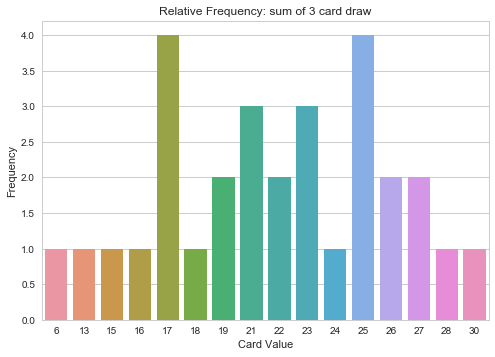

In [19]:
"""Plot list in histogram"""
fig, ax = plt.subplots()

sns.barplot(x="value", y="frequency", data=sum_hands_df)

ax.set_title("Relative Frequency: sum of {} card draw".format(num_cards))
ax.set_ylabel("Frequency")
ax.set_xlabel("Card Value")
plt.show()

The distribution of the summed values of each hand is approximately symmetric with a slight negative skew towards the lower values (for example, 3 or 4). The skew effectively shifts the mean of the distribution higher - in this case to 19.637 - and can be accounted for considering the previous distribution show the card values. In that distribution we can see that it is highly negatively skewed due to the fact that the probability of drawing a card with a value of 10 is higher than all the other possible values which are lower, from 1 to 9.  

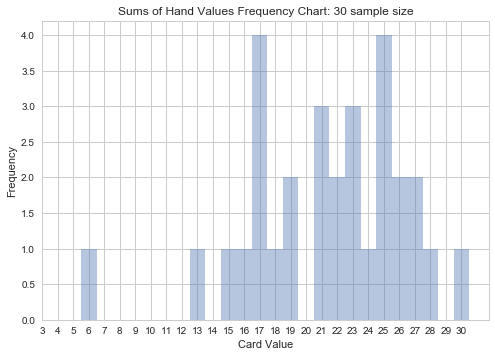

In [20]:
"""Plot list in histogram"""
fig, ax = plt.subplots()

# calculate number of bins
num_bins = max(sum_hands) - min(sum_hands) + 1

sns.distplot(sum_hands, bins=num_bins, hist_kws={"range":(min(sum_hands)-.5,max(sum_hands)+.5)}, ax=ax, kde=False)

ax.set_title("Sums of Hand Values Frequency Chart: {} sample size".format(sample_size))
ax.set_ylabel("Frequency")
ax.set_xlabel("Card Value")
plt.xticks(range(num_cards,len(sum_hands)+1))
plt.show()

### Estimates on values from future draws

In [21]:
# point estimate for population mean mu (little x-bar)
dist_mean = stats.mean(sum_hands)
dist_mean

21.266666666666666

In [22]:
# unbiased estimator for population standard deviation (ddof=1)
dist_stdev = stats.stdev(sum_hands)
dist_stdev

5.14569343427494

In [23]:
# standard error of the mean
import math
std_err = dist_stdev/math.sqrt(sample_size)
std_err

0.9394707893195372

In [24]:
# for 90% confidence interval
sample_90ci = 1.645 * std_err
sample_90ci

1.5454294484306388

In [25]:
sample_min = dist_mean - sample_90ci
sample_min

19.721237218236027

In [26]:
sample_max = dist_mean + sample_90ci
sample_max

22.812096115097305

In [27]:
from scipy import stats as scistats

scistats.norm.interval(.9, loc=dist_mean, scale=dist_stdev/math.sqrt(sample_size))

(19.721374731439461, 22.81195860189387)

I'm taking a single sample. 95% of intervals constructed in this way will contain the population mean. I hope this is one of such intervals. 

Let $X$ = The sum of all {{num_cards}} card hands.

And

Find the probability of $\bar{X}$ being greater than 20.
$$P(\bar{X} \ge 20)$$

Standardize both sides of the inequality:

$$P(\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}} \ge \frac{20-\bar{x}}{\frac{\hat{s}}{\sqrt{n}}})$$

$$P(\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}} \ge \frac{20-21.266}{\frac{5.1457}{\sqrt{30}}})$$

$$P(Z \ge -1.3483)$$

Corresponds to:

$$0.5 + P(0 \le Z \le 1.3483)$$

$$\approx .5 + .4115$$
$$\approx .9115$$
91.15%